# LDA(Linear Discrimination Analysis)

* 선형판별 분석법으로 불리며,PCA와 매우 유사.
* LDA는 PCA와 유사하게 입력 데이터세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소합니다.
* PCA는 입력데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾습니다.
* 클래스간 분산은 크고 클래스 내부 분산이 작은 것을 표현한 것.

## LDA개요
1.클래스 내부와 클래스 간 분산행렬을 구합니다. 이 두 개의 행렬은 입력 데이터의 결정값 클래스별로 개별 피처의 평균벡터를 기반으로 구함.

2.클래스 내부 분산 행렬을 $S_w$, 클래스 간 분산행렬을 $S_b$f라고 하면 다음식으로 두 행렬을 고유벡터로 분해 할 수 있다.

3 고윳값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.

4.고윳값이 가장 큰 순으로 추출된 고유벡터를 이용해서 새롭게 입력데이터를 변환

### 붓꽃 데이터세트에 LDA적용
* 붓꽃 데이터세트를 사이킷런의 LDA를 이용해 변환하고, 그 결과를 품종별로 시각화

In [6]:
# 붓꽃데이터세트 로드하고 표준정규분포로 스케일링
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [11]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target)
iris_data = lda.transform(iris_scaled)

display(iris_data.shape, iris_data) # (150, 2)

(150, 2)

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

* 이제 LDA변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_colmuns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(data = iris_data, columns = lda_colmuns)
irisDF_lda['target']= iris.target

display(irisDF_lda)

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


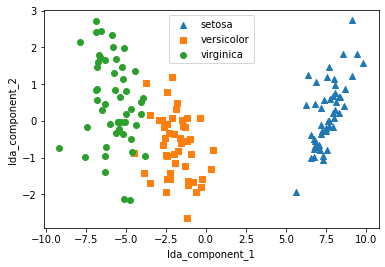

In [20]:
# setosa는 세모, versioolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda.target == i]["lda_component_1"]
    y_axis_data = irisDF_lda[irisDF_lda.target == i]["lda_component_2"]
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc = 'best')
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")
plt.show()